In [1]:
from dolfin import *
from fenics import *
import numpy as np
import mshr
import matplotlib
import matplotlib.pyplot as plt

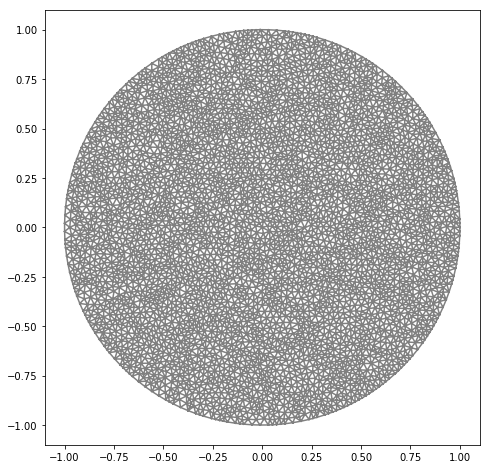

In [2]:
n=48
geometry=mshr.Circle(Point(0.0,0.0),1.0)
mesh = mshr.generate_mesh(geometry,n)
plt.figure(figsize=(8,8))
plot(mesh)

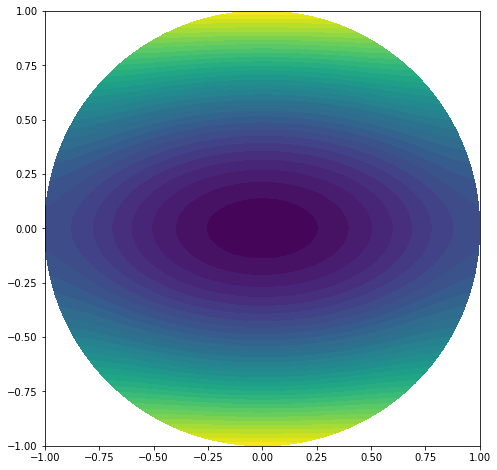

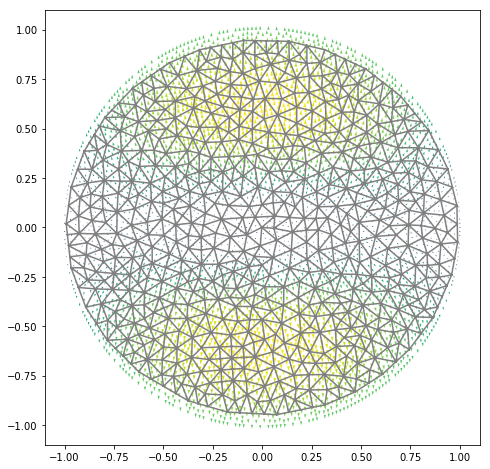

In [3]:
from dolfin import *
from fenics import *



T = 2.0            # final time
num_steps = 40     # number of time steps
dt = T / num_steps # time step size
alpha = 3          # parameter alpha
beta = 1.2         # parameter beta

# Create mesh and define function space
n=48
geometry=mshr.Circle(Point(0.0,0.0),1.0)
mesh = mshr.generate_mesh(geometry,n)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + alpha*x[1]*x[1] + beta*t',
                 degree=2, alpha=alpha, beta=beta, t=0)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define initial value

u_n = interpolate(u_D, V)
#u_n = project(u_D, V)


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(beta - 2 - 2*alpha)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*u)*v*dx
a, L = lhs(F), rhs(F)

# Time-stepping
u = Function(V)
t = 0
for n in range(1):

    # Update current time
    t += dt
    u_D.t = t # update for bc

    # Compute solution
    solve(a == L, u, bc)


    # Update previous solution
    u_n.assign(u)
    
    # Plot result
    plt.figure(figsize=(8,8))
    plot((u_n))
    
    # Gradient of the solution
    plt.figure(figsize=(8,8))
    plot(grad(u_n)*u_n**(-1))
    
    #  To make calculations with the gradient we need to project it to a vector function space.
    V_vec = VectorFunctionSpace(mesh, "CG", 1)
    
    # Mesh velocity
    MeshVelocity = project(grad(u_n) * u_n **(-1),V_vec)
    
    # Mesh's boundary
    boundary = cpp.mesh.BoundaryMesh(mesh, 'exterior', False)
    
    for i in range(len(boundary.coordinates())):
        p = boundary.coordinates()[i]
        boundary.coordinates()[i] -= dt*MeshVelocity(p)
    
    domain_vertices = [Point(x,y) for x,y in boundary.coordinates()[::8]]
    
    geometry = mshr.Polygon(domain_vertices)
    mesh = mshr.generate_mesh(geometry, 16)
    plot(mesh)
    
    V = FunctionSpace(mesh, 'P', 1)


    
    

In [4]:
# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + alpha*x[1]*x[1] + beta*t',
                 degree=2, alpha=alpha, beta=beta, t=0)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define initial value

u_n = interpolate(u_D, V)
#u_n = project(u_D, V)


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(beta - 2 - 2*alpha)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*u)*v*dx
a, L = lhs(F), rhs(F)

# Time-stepping
u = Function(V)

In [5]:
 # Update current time
t += dt
u_D.t = t # update for bc

# Compute solution
solve(a == L, u, bc)

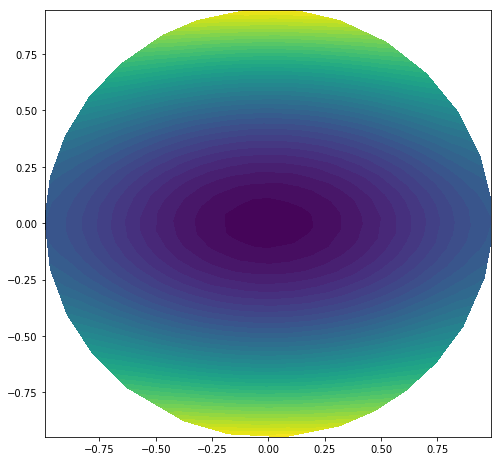

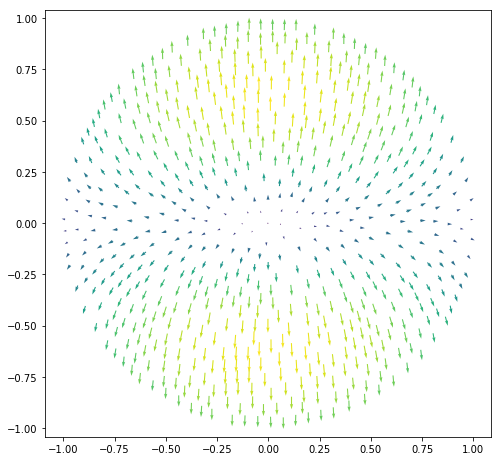

In [6]:
# Update previous solution
u_n.assign(u)

# Plot result
plt.figure(figsize=(8,8))
plot((u_n))

# Gradient of the solution
plt.figure(figsize=(8,8))
plot(grad(u_n)*u_n**(-1))

In [7]:
#  To make calculations with the gradient we need to project it to a vector function space.
V_vec = VectorFunctionSpace(mesh, "CG", 1)

# Mesh velocity
MeshVelocity = project(grad(u_n) * u_n **(-1),V_vec)

# Mesh's boundary
boundary = cpp.mesh.BoundaryMesh(mesh, 'exterior', False)

for i in range(len(boundary.coordinates())):
    p = boundary.coordinates()[i]
    boundary.coordinates()[i] -= dt*MeshVelocity(p)

In [ ]:
domain_vertices = [Point(x,y) for x,y in boundary.coordinates()[::8]]
    
geometry = mshr.Polygon(domain_vertices)
mesh = mshr.generate_mesh(geometry, 16)
plot(mesh)
    